Training and Visualizing a decision tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]   #Petal length and width
y = iris.target

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

: 

Estimating Class Probabilities

In [1]:
print(tree_clf.predict_proba([[5, 1.5]]))
tree_clf.predict([[5,1.5]])  #assigns the class to the highest possible probability

NameError: name 'tree_clf' is not defined

The CART Training algorithm

Regression

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file="iris_tree_reg.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Excercises


In [159]:
#1 
"""The depth of a well-balanced binary tree containing m leaves is
equal to log2(m),2 rounded up. A binary Decision Tree (one that
makes only binary decisions, as is the case with all trees in Scikit-
Learn) will end up more or less well balanced at the end of
training, with one leaf per training instance if it is trained without
restrictions. Thus, if the training set contains one million
instances, the Decision Tree will have a depth of log2(106) ≈ 20
(actually a bit more since the tree will generally not be perfectly
well balanced)."""

'The depth of a well-balanced binary tree containing m leaves is\nequal to log2(m),2 rounded up. A binary Decision Tree (one that\nmakes only binary decisions, as is the case with all trees in Scikit-\nLearn) will end up more or less well balanced at the end of\ntraining, with one leaf per training instance if it is trained without\nrestrictions. Thus, if the training set contains one million\ninstances, the Decision Tree will have a depth of log2(106) ≈ 20\n(actually a bit more since the tree will generally not be perfectly\nwell balanced).'

In [160]:
#2
"""A node’s Gini impurity is generally lower than its parent’s. This is
due to the CART training algorithm’s cost function, which splits
each node in a way that minimizes the weighted sum of its
children’s Gini impurities. However, it is possible for a node to
have a higher Gini impurity than its parent, as long as this
increase is more than compensated for by a decrease in the other
child’s impurity. For example, consider a node containing four
instances of class A and one of class B. Its Gini impurity is
1 − (
1
5
2
)
− (
4
5
2
)
= 0.32. Now suppose the dataset is one-
dimensional and the instances are lined up in the following order:
A, B, A, A, A. You can verify that the algorithm will split this
node after the second instance, producing one child node with
instances A, B, and the other child node with instances A, A, A.
2
2
The first child node’s Gini impurity is 1 − ( ) − ( ) = 0.5,
which is higher than its parent’s. This is compensated for by the
fact that the other node is pure, so its overall weighted Gini
impurity is × 0.5 + × 0 = 0.2, which is lower than the parent’s
Gini impurity."""

'A node’s Gini impurity is generally lower than its parent’s. This is\ndue to the CART training algorithm’s cost function, which splits\neach node in a way that minimizes the weighted sum of its\nchildren’s Gini impurities. However, it is possible for a node to\nhave a higher Gini impurity than its parent, as long as this\nincrease is more than compensated for by a decrease in the other\nchild’s impurity. For example, consider a node containing four\ninstances of class A and one of class B. Its Gini impurity is\n1 − (\n1\n5\n2\n)\n− (\n4\n5\n2\n)\n= 0.32. Now suppose the dataset is one-\ndimensional and the instances are lined up in the following order:\nA, B, A, A, A. You can verify that the algorithm will split this\nnode after the second instance, producing one child node with\ninstances A, B, and the other child node with instances A, A, A.\n2\n2\nThe first child node’s Gini impurity is 1 − ( ) − ( ) = 0.5,\nwhich is higher than its parent’s. This is compensated for by the\nfact th

In [161]:
#3 
"""Decision Trees don’t care whether or not the training data is
scaled or centered; that’s one of the nice things about them. So if
a Decision Tree underfits the training set, scaling the input
features will just be a waste of time."""

'Decision Trees don’t care whether or not the training data is\nscaled or centered; that’s one of the nice things about them. So if\na Decision Tree underfits the training set, scaling the input\nfeatures will just be a waste of time.'

In [10]:
#4 When a decision tree is underfitting the training set,And the dataset is not scaled it can be assumed that the model is biased towards the unscaled values of the features hence the underfitting. And scaling those features will definitely help

In [162]:
#5 
"""The computational complexity of training a Decision Tree is O(n
× m log(m)). So if you multiply the training set size by 10, the
training time will be multiplied by K = (n × 10m × log(10m)) / (n
× m × log(m)) = 10 × log(10m) / log(m). If m = 106, then K ≈ 11.7,
so you can expect the training time to be roughly 11.7 hours."""

'The computational complexity of training a Decision Tree is O(n\n× m log(m)). So if you multiply the training set size by 10, the\ntraining time will be multiplied by K = (n × 10m × log(10m)) / (n\n× m × log(m)) = 10 × log(10m) / log(m). If m = 106, then K ≈ 11.7,\nso you can expect the training time to be roughly 11.7 hours.'

In [163]:
#6
"""Presorting the training set speeds up training only if the dataset is
smaller than a few thousand instances. If it contains 100,000
instances, setting presort=True will considerably slow down
training."""

'Presorting the training set speeds up training only if the dataset is\nsmaller than a few thousand instances. If it contains 100,000\ninstances, setting presort=True will considerably slow down\ntraining.'

In [13]:
#7

from sklearn.datasets import make_moons
data = make_moons(n_samples=10000, noise=0.4)

In [16]:
X,y  = data[0], data[1]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape

((8000, 2), (8000,))

In [91]:
len(X_test)

2000

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [28]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [29]:
GridSearchCV?


Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [38]:
param_grid = ({'max_depth':[1,5,10,20],'max_leaf_nodes':[2,5,10,20],})

In [39]:
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [143]:
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
grid_search.best_score_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

f1_score(y_test,y_pred)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.859

In [145]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [ ]:
from sklearn.model_selection import ShuffleSplit
ShuffleSplit?

In [55]:
import numpy as np


In [75]:
def shuffler_selector():
    L=1000
    cage = []
    conc = np.c_[X,y]
    while L>=0:
        np.random.shuffle(conc)
        data = conc[:100]
        tr_ix, ts_ix = ShuffleSplit(n_splits=)
    

In [89]:
shuffler = ShuffleSplit(n_splits=1000,train_size=100,test_size=None)
conc = np.c_[X,y]

In [109]:
for i,j in shuffler.split(conc):
    print(i)

[ 336 7088 8638 2356 6612 5100 2905 1138 6019 4988 8041 6609 9579 5592
 4656 6799   58 4952 8683 8613 6988 1523 7252  761 1417 6675 6044 9156
 7669 9472 5740 2675 8771 4033  357 6162 6903 1875 3019 9584 6401 8849
 2243 4221 9625 6319 8739 8829 4039 7360 9168   18  353 5035 9632 7915
 2156 2938 9233  566 2066 4147 7038 1263 4393 5803 5672 6010 7341 2073
 9128 4327 1955 8009   92 6506 1723 7489 5741 2709  378 9067 1160 1211
 6992 4188 5362 8177 5143 6134  440 7181 2387 1497 8656 1019 3945  833
 7863  167]
[ 929 3910 7360  780 7919 3030 8434 1024 4431 7466 5830 2936 8990 7620
 8916   84 8065 9230 7306 8514 5510 3854 7946 1232 9267 3666 8047 3135
 8829 3988 8676 3327 3126 9542 7319 5457 6114  235 1766 4292 5703 3837
 5675 2949 3572  283  361 8430  478 1942 6694 4946 4229 5453 5043 8703
 1718  883 7691 8278 6115 5586 3093 1740 4331 4496 8107 3659 2687 2214
 7664 3634 9638 1879 9075 6418 8910 6949 3529 3567 6870 5944 7055 6492
 9237 4705 9157 6857 4464 4337 7701 2599 8275 2171 1434  345 2794

In [146]:
from sklearn.base import clone

def modeller():
    model_cont = dict()
    for i,j in enumerate(shuffler.split(conc)):
        best_model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5).fit(conc[j[0]][:,:2],conc[j[0]][:,2])
        model_cont[i] = best_model
    return model_cont


In [147]:
models = modeller()

In [148]:
def accu_checker(models):
    scores = []
    for model in list(models.values()):
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        scores.append(score)
    return scores

In [150]:
scores = accu_checker(models)

(array([ 24.,  62., 131., 177., 167., 157., 152.,  81.,  39.,  10.]),
 array([0.2045 , 0.26655, 0.3286 , 0.39065, 0.4527 , 0.51475, 0.5768 ,
        0.63885, 0.7009 , 0.76295, 0.825  ]),
 <BarContainer object of 10 artists>)

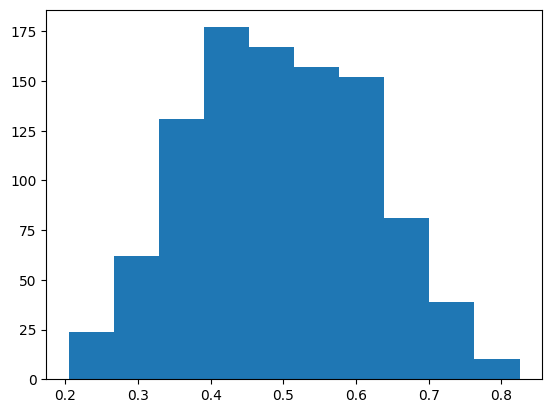

In [158]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=10)
#mostly centered around 50% but there are cases above 80% also